# Nick Juliano
# Computational Physics | Homework 02

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot $log(Error)=log_{10}|f’(numerically)-f’(analytic)|$ against $log_{10}(dx)$ for $dx=1e-16,1e-15,….,0.1$ at $x=π/4$. You should find Error~$dx^n$; what is $n$? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

# Solution
## Part 1

Steps:

1) Create the function that will generate the derivative of a function using the forward difference scheme

2) Define our analytic solution for $\frac{d}{dx}cos(x)=-sin(x)$ evaluated at $x=\frac{\pi}{4}$

3) Evaluate $log|f'(numerical)-f'(analytic)|$ at each $dx$ using a loop.

4) Determine $n$ (the slope from the first point to the minimum error) via simple division.

5) Determine the optimal $dx$ using the min() function.

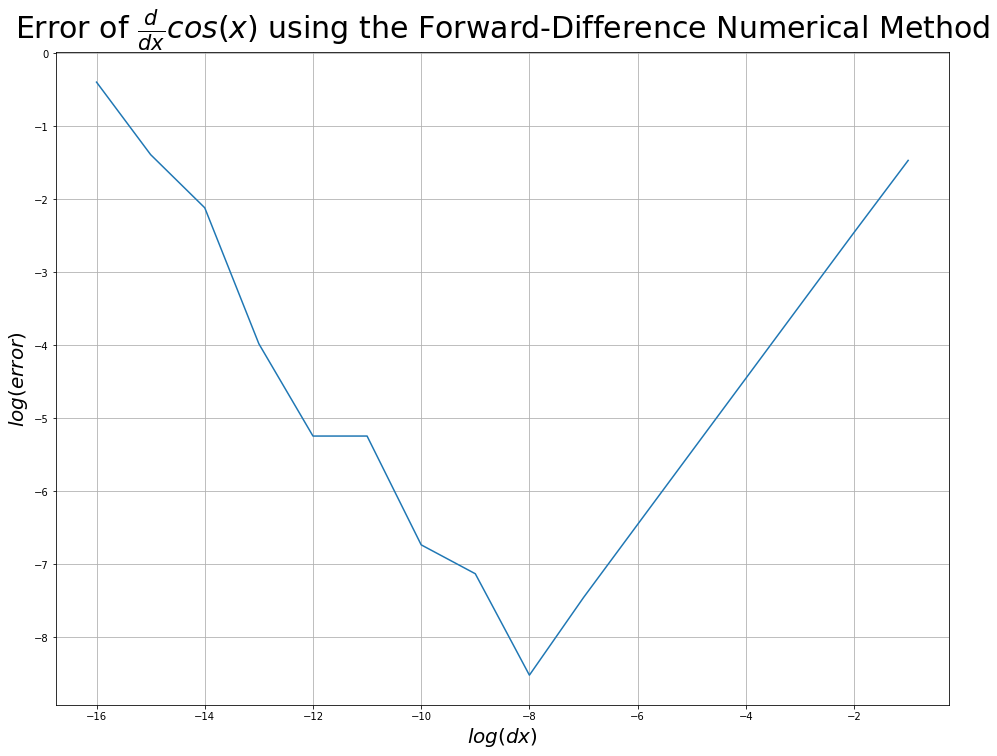

n = 1.0151368213065386
The optimal dx is 1e-08


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1
def derifw(fn, x, dx):
    return (fn(x+dx) - fn(x)) / dx

# Step 2

analytic = -np.sin(np.pi/4)

# Step 3

dx=1*10**(np.sort(-np.arange(1, 17.)))

log_error=[]
for i in dx:
    numerical = derifw(fn=np.cos, x=np.pi/4, dx=i)
    log_error.append(np.log10(np.abs(numerical - analytic)))
    
# Plot
plt.figure(figsize=[16,12])

## Label Figure
plt.title(r'Error of $\frac{d}{dx}cos(x)$ using the Forward-Difference Numerical Method', fontsize=30)
plt.xlabel(r'$log(dx)$', fontsize=20)
plt.ylabel(r'$log(error)$', fontsize=20)

## Create Gridlines
plt.grid()

## Add f(x)to the plot
plt.plot(np.log10(dx), log_error)

## Display the Figure
plt.show()

# Step 4
y_max=log_error[0]
y_min=min(log_error)

x_min=np.log10(dx[0])
x_max=np.log10(dx[log_error.index(min(log_error))])
n = (y_max-y_min) / (x_max-x_min)
print(r'n =', n)

# Step 5
print('The optimal dx is', dx[log_error.index(min(log_error))])

***

## Part 2

This is mostly identical to Part 1, except the function to be defined is one for the central difference scheme.

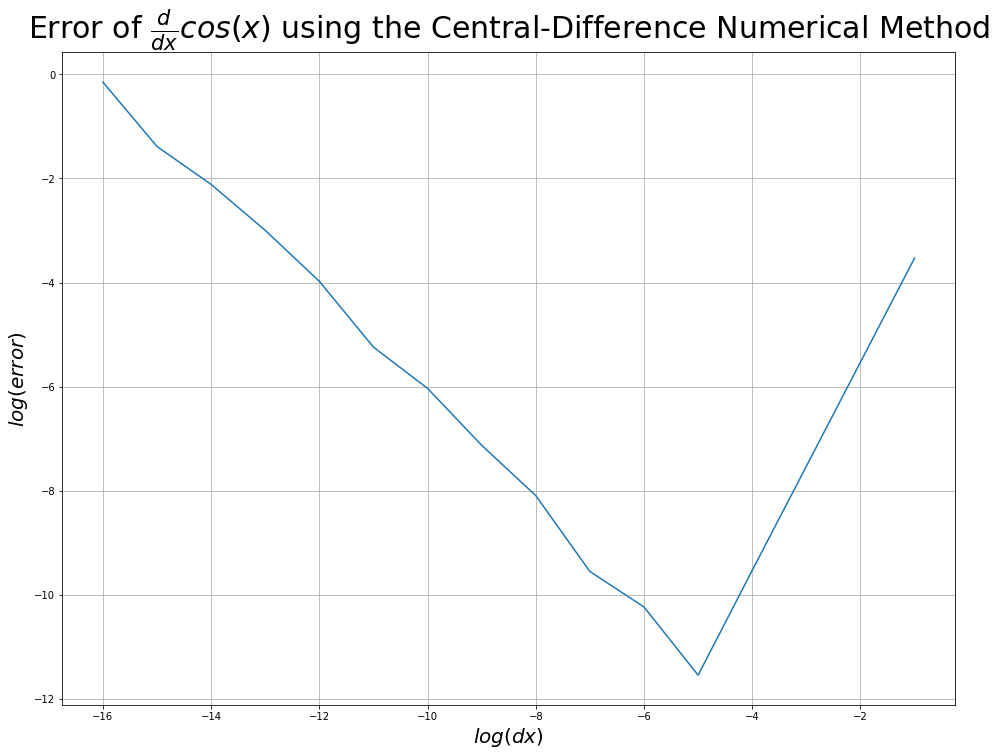

n = 1.0357190726003476
The optimal dx is 1e-05


In [2]:
# Step 1

def dericd(fn,x,dx):
    return (fn(x+dx/2)-fn(x-dx/2))/dx

# Step 2

analytic = -np.sin(np.pi/4)

# Step 3

dx=1*10**(np.sort(-np.arange(1, 17.)))

log_error=[]
for i in dx:
    numerical = dericd(fn=np.cos, x=np.pi/4, dx=i)
    log_error.append(np.log10(np.abs(numerical - analytic)))
    
# Plot
plt.figure(figsize=[16,12])

## Label Figure
plt.title(r'Error of $\frac{d}{dx}cos(x)$ using the Central-Difference Numerical Method', fontsize=30)
plt.xlabel(r'$log(dx)$', fontsize=20)
plt.ylabel(r'$log(error)$', fontsize=20)

## Create Gridlines
plt.grid()

## Add f(x)to the plot
plt.plot(np.log10(dx), log_error)

## Display the Figure
plt.show()

# Step 4
y_max=log_error[0]
y_min=min(log_error)

x_min=np.log10(dx[0])
x_max=np.log10(dx[log_error.index(min(log_error))])
n = (y_max-y_min) / (x_max-x_min)
print(r'n =', n)

# Step 5
print('The optimal dx is', dx[log_error.index(min(log_error))])

This scheme is better because conceptually because it "centers" the computed derivative on the target value. It is better computationally in that it requires less resources (via a larger dx) to minimize error. This error, furthermore, is lower than that of the forward difference scheme. 

***

## Part 3

This is mostly identical to Part 2, except the x is defined to be 0 instead of $\frac{\pi}{4}$.

<ipython-input-3-d093ab0be923>:32: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(dx), np.log10(error))


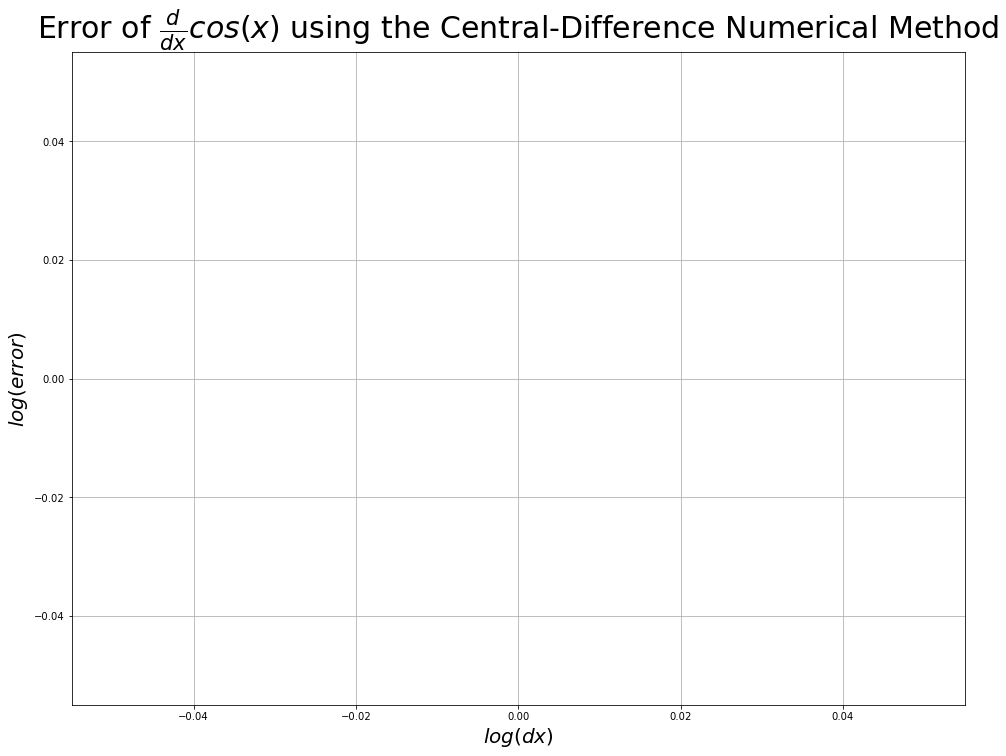

n = nan
The optimal dx is 1e-16


<ipython-input-3-d093ab0be923>:43: RuntimeWarning: invalid value encountered in double_scalars
  n = (error[0]) / (x_max-x_min)


In [3]:
# Step 1

def dericd(fn,x,dx):
    return (fn(x+dx/2)-fn(x-dx/2))/dx

# Step 2

analytic = -np.sin(0)

# Step 3

dx=1*10**(np.sort(-np.arange(1, 17.)))

error=[]

for i in dx:
    numerical = dericd(fn=np.cos, x=0, dx=i)
    error.append(numerical - analytic)
    
# Plot
plt.figure(figsize=[16,12])

## Label Figure
plt.title(r'Error of $\frac{d}{dx}cos(x)$ using the Central-Difference Numerical Method', fontsize=30)
plt.xlabel(r'$log(dx)$', fontsize=20)
plt.ylabel(r'$log(error)$', fontsize=20)

## Create Gridlines
plt.grid()

## Add f(x)to the plot
plt.plot(np.log10(dx), np.log10(error))

## Display the Figure
plt.show()

# Step 4
y_max=error[0]
y_min=min(error)

x_min=np.log10(dx[0])
x_max=np.log10(dx[error.index(min(error))])
n = (error[0]) / (x_max-x_min)
print(r'n =', n)

# Step 5
print('The optimal dx is', dx[error.index(min(error))])

The center difference scheme gives issues here because $sin(0)=0$, and symmetry makes the numerical solution using the central difference scheme also go to 0, meaning there is no error. Error will arise when round-off error is reached.